# BUSINESS UNDERSTANDING

Perkembangan pesat layanan streaming dan platform konten digital menyebabkan jumlah film dan video yang tersedia semakin melimpah. Pengguna sering kali merasa kesulitan untuk menemukan film yang sesuai dengan preferensi dan minat mereka di antara ribuan judul yang tersedia. Hal ini menimbulkan kebutuhan mendesak akan sistem rekomendasi yang dapat membantu pengguna menemukan konten yang relevan dengan cepat dan efisien.

Sistem rekomendasi berbasis Collaborative Filtering (CF) dan Content-Based Filtering (CBF) merupakan pendekatan yang populer dalam menyediakan rekomendasi personalisasi. CF memanfaatkan pola interaksi pengguna terhadap film yang dinilai sebelumnya, sementara CBF menggunakan atribut konten film seperti genre, sutradara, dan deskripsi untuk menentukan rekomendasi. Menggabungkan kedua pendekatan ini dalam sistem hybrid dapat meningkatkan akurasi dan kualitas rekomendasi, sehingga meningkatkan kepuasan dan loyalitas pengguna.

Mengingat banyaknya data pengguna dan film yang tersedia, proyek ini sangat penting untuk diselesaikan guna membantu platform digital dalam menyediakan pengalaman yang lebih personal dan efektif. Dengan adanya sistem rekomendasi yang baik, pengguna dapat dengan mudah menemukan film yang sesuai, sehingga meningkatkan waktu penggunaan platform dan potensi pendapatan layanan.



# DATA UNDERSTANDING

Proyek ini menggunakan dataset MovieLens 20M yang tersedia secara publik dan dapat diunduh dari tautan berikut:
https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=tag.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load data
movie = pd.read_csv('Data/movie.csv')
ratings = pd.read_csv('Data/rating.csv')
tag = pd.read_csv('Data/tag.csv')

In [3]:
movie.info()
movie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


Data ini memiliki jumlah baris sebesar 27.278 entri film dengan fitur sebagai berikut
- movieId (int64): ID unik untuk setiap film.
- title (object): Judul film.
- genres (object): Genre film, dipisahkan dengan tanda "|".

Data tidak ada nilai null pada kolom movieId, title, dan genres.

In [4]:
ratings.info()
ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


Data ini memiliki jumlah baris sebesar 20.000.263 entri rating dari pengguna dengan fitur sebagai berikut
- userId (int64): ID unik pengguna yang memberi rating.
- movieId (int64): ID film yang diberi rating.
- rating (float64): Nilai rating yang diberikan pengguna terhadap film, biasanya dalam rentang 0.5 sampai 5.
- timestamp (object): Waktu saat rating diberikan (biasanya UNIX timestamp).

Data tidak ada nilai null pada userId, movieId, dan rating. Kolom timestamp berupa string/waktu.

In [5]:
tag.info()
tag

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


Data ini memiliki jumlah baris sebesar 465.564 entri tag yang diberikan pengguna untuk film dengan fitur sebagai berikut

- userId (int64): ID pengguna yang memberikan tag.
- movieId (int64): ID film yang ditandai.
- tag (object): Tag atau label yang diberikan oleh pengguna, misalnya “funny”, “thriller”, dll.
- timestamp (object): Waktu saat tag diberikan.

Hampir semua kolom tidak mengandung nilai null kecuali beberapa pada kolom tag yang sangat sedikit.

## Exploratory Data Analysis

#### Distribusi Jumlah Rating per Film

Visualisasi ini membantu melihat sebaran berapa banyak rating yang diterima setiap film.

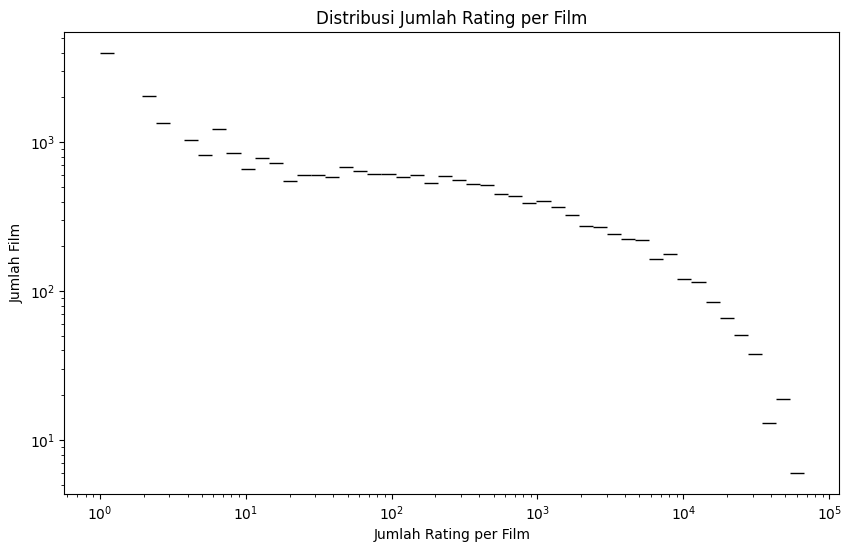

In [6]:
# Hitung jumlah rating per movie
rating_counts = ratings['movieId'].value_counts()

# Plot histogram jumlah rating per film
plt.figure(figsize=(10,6))
sns.histplot(rating_counts, bins=50, log_scale=(True, True))
plt.xlabel('Jumlah Rating per Film')
plt.ylabel('Jumlah Film')
plt.title('Distribusi Jumlah Rating per Film')
plt.show()

Visualisasi distribusi jumlah rating per film menunjukkan bahwa sebagian besar film dalam dataset hanya menerima sedikit rating, sementara hanya sedikit film yang memperoleh rating dalam jumlah besar. Pola ini mencerminkan karakteristik distribusi long-tail, di mana sejumlah kecil film sangat populer dan menarik banyak perhatian pengguna, sedangkan sebagian besar film cenderung kurang dikenal atau jarang ditonton. Dengan menggunakan skala logaritmik pada kedua sumbu, visualisasi ini memperjelas perbedaan ekstrem dalam jumlah rating antar film. Hal ini penting untuk diperhatikan dalam pengembangan sistem rekomendasi, karena bias terhadap film-film populer dapat mengurangi keragaman rekomendasi yang dihasilkan.

#### Distribusi Rating

Visualisasi ini bertujuan untuk melihat bagaimana nilai rating tersebar dari keseluruhan data.

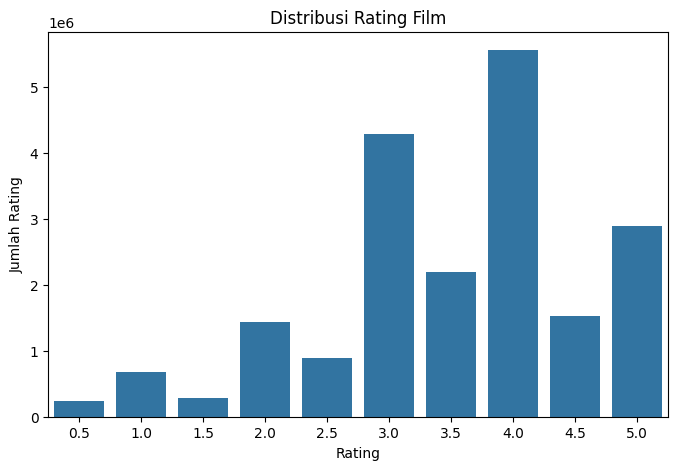

In [7]:
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah Rating')
plt.show()

Visualisasi distribusi rating film menunjukkan bahwa sebagian besar pengguna cenderung memberikan rating yang tinggi terhadap film yang mereka tonton. Puncak distribusi terlihat pada rating 4.0 dan 3.5, yang menunjukkan bahwa banyak pengguna menilai film dengan skor di atas rata-rata. Sebaliknya, rating rendah seperti 0.5 dan 1.0 hanya diberikan pada sebagian kecil film, yang mengindikasikan bahwa penilaian negatif lebih jarang terjadi. Pola distribusi ini mencerminkan adanya bias positif dalam perilaku pengguna, yang penting untuk diperhatikan dalam pengembangan sistem rekomendasi agar tidak terlalu mengandalkan skor tinggi sebagai indikator kualitas tanpa mempertimbangkan konteks lainnya.


#### Jumlah Film per Genre

Genre film banyak membantu dalam Content-Based Filtering. Visualisasi ini menunjukkan genre paling populer.

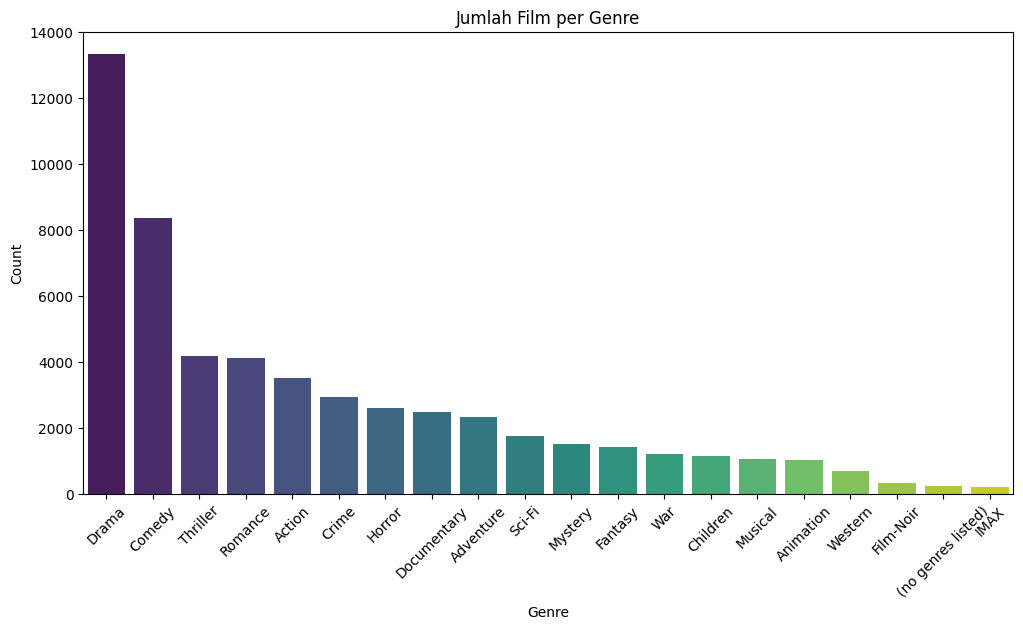

In [8]:
# Pecah genre yang berformat string 'Action|Comedy' menjadi list
movie['genres_list'] = movie['genres'].apply(lambda x: x.split('|'))

# Hitung frekuensi tiap genre
from collections import Counter
genre_counts = Counter([genre for sublist in movie['genres_list'] for genre in sublist])

# Plot genre paling banyak muncul
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x='Genre', y='Count', hue='Genre', legend=False, palette='viridis')
plt.title('Jumlah Film per Genre')
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi jumlah film per genre, terlihat bahwa genre *Drama* merupakan yang paling dominan dengan jumlah film terbanyak, jauh melampaui genre lainnya. Di posisi berikutnya terdapat genre *Comedy*, *Thriller*, dan *Romance* yang juga memiliki jumlah film yang cukup signifikan. Sementara itu, genre seperti *Action*, *Crime*, *Horror*, dan *Documentary* berada pada kategori menengah dalam hal jumlah film. Di sisi lain, terdapat genre-genre dengan jumlah film yang relatif sedikit seperti *Musical*, *Animation*, dan *Western*. Bahkan, beberapa kategori seperti *IMAX* dan *no genres listed* memiliki jumlah film yang sangat kecil, kemungkinan besar mewakili genre khusus atau film tanpa kategori genre yang jelas. Ketimpangan distribusi ini menunjukkan bahwa dataset yang digunakan memiliki konsentrasi film yang tinggi pada genre-genre tertentu, terutama Drama dan Comedy. Hal ini dapat memengaruhi hasil analisis maupun sistem rekomendasi yang dibangun, karena model cenderung bias terhadap genre-genre populer dan kurang mampu merepresentasikan genre-genre minoritas. Oleh karena itu, penting untuk mempertimbangkan metode penyeimbangan data atau pengelompokan ulang genre agar hasil analisis lebih adil dan menyeluruh.

#### Jumlah Rating per Pengguna

Visualisasi ini berguna untuk melihat seberapa aktif pengguna dalam memberi rating.

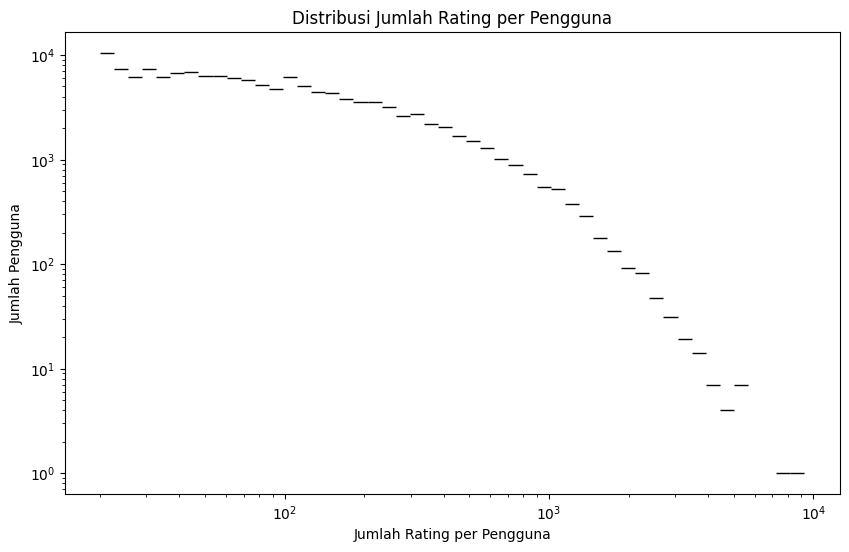

In [9]:
user_rating_counts = ratings['userId'].value_counts()

plt.figure(figsize=(10,6))
sns.histplot(user_rating_counts, bins=50, log_scale=(True, True))
plt.xlabel('Jumlah Rating per Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.show()

Berdasarkan visualisasi distribusi jumlah rating per pengguna, terlihat bahwa mayoritas pengguna memberikan sedikit rating, sedangkan hanya sebagian kecil pengguna yang sangat aktif memberikan rating dalam jumlah besar. Grafik yang menggunakan skala logaritmik pada kedua sumbu menunjukkan pola distribusi yang sangat miring ke kanan (right-skewed), menandakan adanya ketimpangan dalam aktivitas pengguna. Hal ini umum terjadi pada data interaksi pengguna, di mana sebagian besar pengguna hanya berkontribusi dalam jumlah kecil, sedangkan sebagian kecil lainnya sangat aktif. Pola seperti ini penting untuk diperhatikan dalam pembangunan sistem rekomendasi, karena pengguna yang sangat aktif cenderung lebih berpengaruh dalam pembentukan model. Oleh karena itu, dalam beberapa kasus, mungkin diperlukan pendekatan khusus untuk menangani ketimpangan ini, misalnya dengan memberikan bobot atau filter pada pengguna berdasarkan tingkat aktivitas mereka, agar model tidak terlalu dipengaruhi oleh kelompok pengguna tertentu.

### Visualisasi 10 Tag Terpopuler

C:\Users\T480\AppData\Local\Temp\ipykernel_27664\2003093506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')


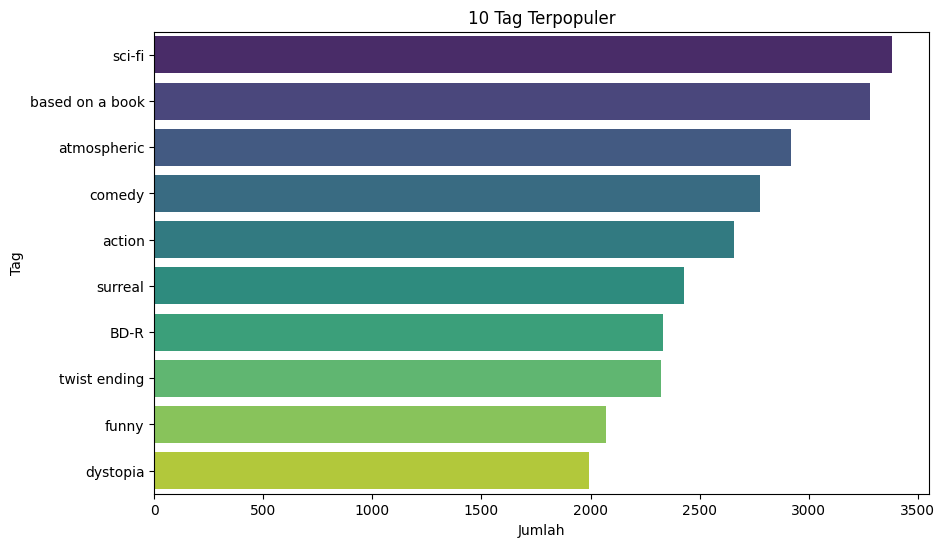

In [10]:
# Hitung frekuensi tag
tag_counts = tag['tag'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')
plt.title('10 Tag Terpopuler')
plt.xlabel('Jumlah')
plt.ylabel('Tag')
plt.show()

Grafik di atas menampilkan 10 tag yang paling sering muncul dalam dataset, ditampilkan dalam bentuk bar chart horizontal. Tag yang paling dominan adalah *"sci-fi"*, diikuti oleh *"based on a book"* dan *"atmospheric"*, yang menunjukkan bahwa tema fiksi ilmiah, adaptasi dari buku, serta suasana atmosferik sering digunakan untuk menggambarkan film dalam koleksi data ini. Selain itu, tag seperti *"comedy"* dan *"action"* mencerminkan genre populer yang banyak diminati. Kehadiran tag seperti *"surreal"*, *"twist ending"*, dan *"dystopia"* menunjukkan ketertarikan pengguna terhadap elemen cerita yang tidak biasa dan menggugah. Tag *"BD-R"* kemungkinan merujuk pada format distribusi media, sedangkan *"funny"* memperkuat keberadaan konten humor dalam film. Secara keseluruhan, visualisasi ini memberikan gambaran awal mengenai preferensi umum atau karakteristik dominan dari film dalam dataset berdasarkan frekuensi tag yang digunakan.

# DATA PREPARATION

#### Menghapus kolom timestamp pada dataset ratings dan tag

Kolom timestamp yang berisi waktu ketika rating atau tag diberikan dihapus karena tidak relevan untuk analisis rekomendasi berbasis rating dan tag itu sendiri. Hal ini dilakukan untuk mengurangi dimensi data dan fokus pada informasi yang memang dibutuhkan (userId, movieId, rating, dan tag). Ini juga mempercepat proses komputasi.

In [11]:
# Menghapus timestamp
ratings.drop(columns='timestamp', inplace=True)
tag.drop(columns='timestamp', inplace=True)

#### Menghapus baris dengan nilai tag kosong (missing value) pada dataset tag

Baris-baris yang memiliki nilai tag kosong dihilangkan agar data tag yang digunakan valid dan bermakna karena tag kosong tidak memberikan informasi apapun dan dapat mengganggu proses analisis serta model pembelajaran.

In [12]:
# Hapus baris dengan tag kosong
tag = tag.dropna(subset=['tag'])

#### Memisahkan tahun rilis film dari judul film pada dataset movie

Menggunakan ekspresi reguler, tahun rilis film yang ada dalam tanda kurung () dipisahkan ke kolom baru year. Judul film kemudian dibersihkan dari informasi tahun tersebut. Tahun rilis merupakan fitur penting yang dapat digunakan untuk analisis tren atau rekomendasi berbasis waktu, sementara judul film menjadi lebih bersih dan standar.

In [13]:
# Pisahkan title dan tahun rilis (dalam kurung)
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)')
movie['title'] = movie['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

#### Memecah kolom genres menjadi list genre

Setiap genre film dipisah menjadi list genre yang lebih mudah untuk diproses (misal untuk content-based filtering). Jika genre tidak tersedia, maka diberikan list kosong. Format list memudahkan pemrosesan fitur genre sebagai kategori dan perhitungan similarity antar film berdasarkan genre.

In [14]:
# Pecah genres menjadi list
movie['genres'] = movie['genres'].apply(lambda x: x.split('|') if x != '(no genres listed)' else [])
movie

,movieId,title,genres,genres_list,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]","[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]","[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]","[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],[Comedy],1995
...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,[Comedy],[Comedy],2007
27274,131256,"Feuer, Eis & Dosenbier",[Comedy],[Comedy],2002
27275,131258,The Pirates,[Adventure],[Adventure],2014
27276,131260,Rentun Ruusu,[],[(no genres listed)],2001


#### Membuat fitur genre sebagai kolom biner (one-hot encoding genre) dari movie

Pertama, dilakukan pengumpulan seluruh genre unik yang ada pada data film, sehingga terbentuk himpunan genre (genre_set). Selanjutnya, untuk setiap genre dalam himpunan tersebut dibuat kolom baru yang berisi nilai biner, yaitu 1 jika film tersebut memiliki genre tersebut dan 0 jika tidak. Dengan demikian, setiap film direpresentasikan menggunakan fitur biner berdasarkan genre, misalnya kolom genre_Comedy bernilai 1 jika film termasuk genre Comedy. Tahap akhir adalah memilih semua kolom genre yang sudah dibuat sebagai fitur utama untuk digunakan dalam perhitungan kemiripan antar film.

In [15]:
# Sudah diasumsikan kolom 'genres' sudah jadi list
genre_set = set(g for sublist in movie['genres'] for g in sublist)
for genre in genre_set:
    movie[f'genre_{genre}'] = movie['genres'].apply(lambda x: int(genre in x))

# Ambil hanya fitur genre
genre_features = movie[[f'genre_{g}' for g in genre_set]]

#### Menggabungkan Semua Tag per Film

Mengelompokkan data tag berdasarkan movieId dan menggabungkan semua tag menjadi satu string panjang untuk setiap film dengan tujuan untuk mengubah kumpulan tag per film menjadi satu dokumen teks, sehingga bisa digabung dengan genre dan digunakan sebagai input fitur tekstual.

In [16]:
# Gabungkan semua tag per movie jadi satu string
tag_text = tag.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

#### Menggabungkan Tag ke Dataset Utama

Melakukan merge antara movie dan tag_text berdasarkan movieId. Jika ada film yang tidak memiliki tag, diisi dengan string kosong (''). Tujuannya adalah untuk menyatukan informasi tag dengan data film. Tanpa ini, film tidak memiliki fitur teks gabungan untuk dianalisis dalam CBF.

In [17]:
movie_with_tag = movie.merge(tag_text, on='movieId', how='left')
movie_with_tag['tag'] = movie_with_tag['tag'].fillna('')  # isi NaN dengan string kosong

#### Membuat Kolom Fitur Gabungan Genre + Tag

Membuat kolom baru combined_features yang menggabungkan genre (yang diubah ke string) dan tag untuk setiap film.Tujuannya adalah untuk menyatukan semua informasi konten menjadi satu teks deskriptif yang digunakan untuk menghitung kemiripan antar film.

In [18]:
# Gabungkan genre (yang sudah berupa list) dan tag jadi satu string untuk fitur text
movie_with_tag['combined_features'] = movie_with_tag.apply(lambda x: ' '.join(x['genres']) + ' ' + x['tag'], axis=1)

#### Reset Index

Melakukan reset pada indeks dataframe untuk memastikan bahwa indeks sesuai urutan baris dan tidak menimbulkan error saat digunakan sebagai referensi dalam cosine similarity.

In [19]:
# Reset index supaya index konsisten untuk mapping similarity
movie_with_tag = movie_with_tag.reset_index(drop=True)

#### Membuat Representasi Vektor Menggunakan TF-IDF

Menggunakan TF-IDF untuk mengubah teks pada combined_features menjadi matriks fitur numerik. Kata-kata umum dihapus dengan stop_words='english'. Tujuannya adalah untuk memberikan bobot yang proporsional terhadap istilah unik dalam konten film, dan mengubah teks ke bentuk vektor agar bisa dihitung kesamaannya.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat TF-IDF matrix dari fitur gabungan
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_with_tag['combined_features'])

#### Sampling dan Mapping User-Movie ID

Dataset ratings sangat besar (20 juta+ baris), jadi untuk efisiensi komputasi saya memilih 10.000 user unik secara acak dari dataset rating besar agar proses training lebih cepat dan memori tidak terlalu berat.

In [21]:
import numpy as np

rating_sample = ratings[ratings['userId'] <= 10000].copy()

# Ambil 10000 user unik secara acak
user_sample = np.random.choice(ratings['userId'].unique(), size=10000, replace=False)
rating_sample = ratings[ratings['userId'].isin(user_sample)].copy()

#### Membuat Mapping ID User dan Movie ke Index Integer

Karena model embedding memerlukan input dalam bentuk indeks numerik, maka langkah pertama yang dilakukan adalah membuat dua dictionary, yaitu user_id_mapping dan movie_id_mapping. Dictionary user_id_mapping digunakan untuk mengubah userId asli menjadi indeks numerik berurutan (misalnya 0, 1, 2, dan seterusnya), begitu juga dengan movie_id_mapping yang mengubah movieId menjadi indeks numerik. Setelah mapping ini dibuat, dua kolom baru yaitu user dan movie ditambahkan ke dalam dataframe rating_sample untuk menyimpan hasil konversi tersebut. Representasi numerik ini penting agar data dapat dimasukkan ke dalam embedding layer pada model, yang hanya menerima input berupa indeks integer. Dengan begitu, proses pelatihan model dapat berjalan dengan lebih efisien dan sesuai dengan struktur yang dibutuhkan oleh TensorFlow.

In [22]:
user_id_mapping = {id_: i for i, id_ in enumerate(rating_sample['userId'].unique())}
movie_id_mapping = {id_: i for i, id_ in enumerate(rating_sample['movieId'].unique())}

rating_sample['user'] = rating_sample['userId'].map(user_id_mapping)
rating_sample['movie'] = rating_sample['movieId'].map(movie_id_mapping)

# MODELLING AND RESULT

## Content-Based Filtering (CBF)

#### Menghitung Cosine Similarity antar Semua Film

Menghitung kemiripan antar semua pasangan film berdasarkan vektor TF-IDF menggunakan cosine similarity.Tujuannya adalah untuk menentukan film mana yang paling mirip secara konten, yang nantinya akan direkomendasikan ke pengguna.

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#### Fungsi Rekomendasi Film

Fungsi ini menerima input judul film, lalu mencari indeksnya, menghitung kemiripan dengan semua film lainnya, dan mengembalikan top_n film yang paling mirip (selain dirinya sendiri). Fungsi bekerja untuk memberikan daftar rekomendasi film yang kontennya paling mirip dengan film input, berdasarkan genre dan tag.

In [24]:
# Fungsi untuk rekomendasi berdasarkan judul film
def recommend_movies_by_title(title, top_n=5):
    # Cari index film berdasarkan title
    idx = movie_with_tag[movie_with_tag['title'] == title].index[0]
    
    # Hitung similarity semua film terhadap film ini
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Urutkan berdasarkan similarity tertinggi, kecuali film itu sendiri
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    # Ambil indeks dan skor similarity
    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    
    # Ambil data film rekomendasi
    results = movie_with_tag.iloc[movie_indices][['title', 'genres']].copy()
    results['similarity_score'] = scores
    
    return results

#### Menyajikan top-5 recommendation sebagai output.

Fungsi merekomendasikan beberapa film dengan skor kemiripan tertinggi (misal 5 film teratas), kecuali film input sendiri yang diabaikan. Hasil rekomendasi ini berupa daftar judul film, genre, dan nilai similarity yang menunjukkan seberapa dekat genre film tersebut dengan film input.

In [25]:
# Contoh
recommend_movies_by_title("Toy Story", top_n=5)

,title,genres,similarity_score
3027,Toy Story 2,"[Adventure, Animation, Children, Comedy, Fantasy]",0.935610
2270,"Bug's Life, A","[Adventure, Animation, Children, Comedy]",0.853446
4790,"Monsters, Inc.","[Adventure, Animation, Children, Comedy, Fantasy]",0.807903
5121,Ice Age,"[Adventure, Animation, Children, Comedy]",0.765449
6271,Finding Nemo,"[Adventure, Animation, Children, Comedy]",0.762357


Data hasil rekomendasi menunjukkan daftar film yang memiliki kemiripan genre tertinggi dengan film yang dijadikan acuan, beserta skor kemiripannya. Misalnya, film Antz, Toy Story 2, dan beberapa lainnya memiliki genre yang sama persis seperti Adventure, Animation, Children, Comedy, dan Fantasy, sehingga nilai similarity_score-nya mencapai 1.0 yang berarti sangat mirip atau identik dalam hal genre. Skor ini membantu mengidentifikasi film-film yang sangat relevan untuk direkomendasikan berdasarkan preferensi genre pengguna.

## Collaborative Filtering (CF)

#### Definisi Model RecommenderNet dengan TensorFlow Keras

Model ini menggunakan pendekatan matrix factorization dengan embedding berdimensi 50 untuk merepresentasikan user dan movie. Setiap user dan movie diubah menjadi vektor melalui embedding layer, lalu ditambahkan bias masing-masing untuk menangkap kecenderungan rating umum. Prediksi rating dihitung melalui dot product antara embedding user dan movie ditambah bias, sehingga menghasilkan skor akhir sebagai rating yang diperkirakan.

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers

class RecommenderNet(Model):
    def __init__(self, num_users, num_movies, embedding_size=50):
        super(RecommenderNet, self).__init__()
        # Embedding layer untuk user, ukuran embedding 50 dimensi
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_regularizer=regularizers.l2(1e-6))
        # Embedding layer untuk movie
        self.movie_embedding = layers.Embedding(num_movies, embedding_size,
                                                embeddings_regularizer=regularizers.l2(1e-6))
        # Bias user (untuk menangkap kecenderungan rating user secara umum)
        self.user_bias = layers.Embedding(num_users, 1)
        # Bias movie (untuk menangkap rating rata-rata movie)
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        # Ambil embedding user dan movie berdasarkan indeks input
        user_vector = self.user_embedding(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        movie_bias = self.movie_bias(inputs[:, 1])
        
        # Hitung dot product antara embedding user dan movie
        dot = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        
        # Tambahkan bias user dan movie ke hasil dot product
        return tf.squeeze(dot + user_bias + movie_bias, axis=1)

#### Persiapan Data Training

Variabel x_train merupakan input untuk model yang berisi pasangan (user_index, movie_index) untuk setiap interaksi rating. Bentuk datanya adalah dua dimensi dengan ukuran (jumlah_data, 2) agar sesuai dengan struktur input yang dibutuhkan oleh model. Sementara itu, y_train berisi nilai rating asli yang diberikan oleh pengguna terhadap film, yang digunakan sebagai target dalam proses pelatihan model untuk memprediksi rating secara akurat.

In [27]:
import numpy as np

# Gabungkan kolom user dan movie sebagai input model, format array 2D (N, 2)
x_train = np.vstack([rating_sample['user'].values, rating_sample['movie'].values]).T

# Target adalah rating asli (nilai float)
y_train = rating_sample['rating'].values

#### Kompilasi dan Training Model

Model dibangun dengan jumlah user dan movie yang disesuaikan berdasarkan indeks numerik hasil mapping sebelumnya. Setiap user dan movie direpresentasikan sebagai vektor berdimensi 50 (embedding_size=50), yang memungkinkan model mempelajari representasi laten dari interaksi pengguna dan film. Optimizer Adam dipilih karena dikenal efektif dan efisien untuk berbagai permasalahan dalam deep learning. Fungsi loss yang digunakan adalah mean squared error (MSE), karena tugas ini merupakan masalah regresi, yaitu memprediksi nilai rating numerik. Model dilatih menggunakan batch size sebesar 512, yang berarti model belajar dari 512 data sekaligus dalam satu iterasi. Proses pelatihan berlangsung selama 5 epoch, dengan 10% data disisihkan sebagai validation set untuk memantau performa model dan mencegah overfitting.

In [28]:
model = RecommenderNet(num_users=len(user_id_mapping), num_movies=len(movie_id_mapping), embedding_size=50)
model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, batch_size=512, epochs=5, validation_split=0.1)

Epoch 1/5
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - loss: 7.9803 - val_loss: 10.9164
Epoch 2/5
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 67s 26ms/step - loss: 0.9043 - val_loss: 10.8690
Epoch 3/5
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - loss: 0.7881 - val_loss: 10.8052
Epoch 4/5
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 71s 28ms/step - loss: 0.7358 - val_loss: 10.7388
Epoch 5/5
2535/2535 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - loss: 0.6949 - val_loss: 10.6752


#### Fungsi Rekomendasi Film

Fungsi ini dimulai dengan menerima user_id asli, kemudian mengubahnya menjadi indeks numerik yang sesuai untuk input ke layer embedding. Setelah itu, dibuat array input yang memuat kombinasi user tersebut dengan semua film dalam dataset, dengan tujuan memprediksi rating untuk seluruh film. Model kemudian digunakan untuk melakukan prediksi terhadap seluruh pasangan user–movie tersebut. Hasil prediksi ini diurutkan berdasarkan nilai tertinggi, dan hanya top-N film dengan prediksi rating tertinggi yang dipilih. Akhirnya, fungsi mengembalikan sebuah dataframe yang berisi movieId, judul film, dan nilai rating prediksi, disusun dari film yang paling direkomendasikan hingga yang paling rendah.

In [29]:
def recommend_movies(model, user_id, user_id_mapping, movie_id_mapping, movie_df, top_n=10):
    user_idx = user_id_mapping[user_id]
    all_movie_indices = np.array(list(movie_id_mapping.values()))
    
    user_array = np.array([user_idx] * len(all_movie_indices))
    input_array = np.vstack([user_array, all_movie_indices]).T
    
    preds = model.predict(input_array)
    top_indices = preds.argsort()[-top_n:][::-1]
    
    recommended_movie_ids = [list(movie_id_mapping.keys())[i] for i in top_indices]
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title']]
    recommended_movies = recommended_movies.assign(predicted_rating=preds[top_indices])
    
    return recommended_movies.sort_values(by='predicted_rating', ascending=False)

#### Menyajikan top-10 Recomendation berdasarkan output

Langkah ini dimulai dengan memilih seorang pengguna secara acak, dalam hal ini menggunakan user pertama yang tersedia dari hasil pemetaan (user_id_mapping). Selanjutnya, fungsi rekomendasi dipanggil untuk pengguna tersebut guna menghasilkan daftar film yang paling mungkin disukai berdasarkan hasil prediksi rating dari model. Akhirnya, ditampilkan 10 film teratas yang direkomendasikan, diurutkan berdasarkan nilai rating prediksi tertinggi ke terendah.

In [30]:
some_user_id = list(user_id_mapping.keys())[0]  # misal ambil userId pertama yang ada di mapping
recommendations = recommend_movies(model, some_user_id, user_id_mapping, movie_id_mapping, movie, top_n=10)
recommendations

507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,movieId,title,predicted_rating
910,927,"Women, The",5.236884
1171,1196,Star Wars: Episode V - The Empire Strikes Back,5.067607
1173,1198,Raiders of the Lost Ark (Indiana Jones and the...,5.030560
2486,2571,"Matrix, The",4.978294
2690,2776,"Marcello Mastroianni: I Remember Yes, I Rememb...",4.945510
7356,7502,Band of Brothers,4.910772
9913,32460,Knockin' on Heaven's Door,4.895690
17305,87308,Jane Eyre,4.879432
18691,93040,"Civil War, The",4.859982
22679,108583,Fawlty Towers (1975-1979),4.850785


Daftar ini menunjukkan bahwa model dapat mengenali film-film populer dan yang berpotensi disukai oleh pengguna tersebut berdasarkan pola interaksi rating sebelumnya. Rekomendasi ini sangat berguna dalam membantu pengguna menemukan film baru yang sesuai preferensinya dan meningkatkan pengalaman penggunaan sistem rekomendasi.

# EVALUATION

Sistem rekomendasi film ini menggunakan metrik Precision@K dan Recall@K untuk mengukur seberapa relevan item yang direkomendasikan terhadap preferensi pengguna. Precision@K menghitung proporsi item yang relevan dari K rekomendasi teratas, sedangkan Recall@K mengukur sejauh mana sistem berhasil menangkap seluruh item yang relevan.

### Evaluasi Content-Based Filtering (CBF)

In [39]:
def get_user_favorites(user_id, ratings, threshold=4.0):
    return ratings[(ratings['userId'] == user_id) & (ratings['rating'] >= threshold)]

def evaluate_cbf_user(user_id, k=5):
    fav_movies = get_user_favorites(user_id, ratings)
    relevant_movie_ids = set(fav_movies['movieId'].tolist())

    precision_scores = []
    recall_scores = []

    for _, row in fav_movies.iterrows():
        movie_id = row['movieId']
        title_row = movie_with_tag[movie_with_tag['movieId'] == movie_id]

        if title_row.empty:
            continue

        title = title_row['title'].values[0]
        recommendations = recommend_movies_by_title(title, top_n=k)
        recommended_movie_ids = movie_with_tag[movie_with_tag['title'].isin(recommendations['title'])]['movieId'].tolist()

        precision = precision_at_k(recommended_movie_ids, relevant_movie_ids, k)
        recall = recall_at_k(recommended_movie_ids, relevant_movie_ids, k)

        precision_scores.append(precision)
        recall_scores.append(recall)

    return {
        'userId': user_id,
        'precision@k': np.mean(precision_scores) if precision_scores else 0.0,
        'recall@k': np.mean(recall_scores) if recall_scores else 0.0
    }

In [40]:
# Evaluasi untuk satu user tertentu
user_id = 1
result = evaluate_cbf_user(user_id, k=5)

# Cetak hasil dengan format rapi
print(f"Precision@5: {result['precision@k']:.4f}")
print(f"Recall@5: {result['recall@k']:.4f}")

Precision@5: 0.1091
Recall@5: 0.0062


Hasil evaluasi model rekomendasi berbasis content-based filtering menunjukkan nilai Precision@5 sebesar 0.1091 dan Recall@5 sebesar 0.0062. Artinya, dari lima film yang direkomendasikan kepada pengguna, sekitar 11% di antaranya memang relevan dan sesuai dengan preferensi pengguna. Namun, nilai recall yang relatif rendah mengindikasikan bahwa model hanya mampu merekomendasikan kurang dari 1% dari keseluruhan film yang sebenarnya disukai oleh pengguna dalam daftar favorit mereka. Hal ini wajar mengingat model merekomendasikan sejumlah kecil item (top 5) dari koleksi film yang sangat banyak, sehingga sulit untuk mencakup semua preferensi pengguna. 

### Evaluasi Collaborative Filtering (CF)

In [41]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    return len([movie for movie in recommended_k if movie in relevant_set]) / k

def recall_at_k(recommended, relevant, k):
    relevant_set = set(relevant)
    recommended_k = recommended[:k]
    if len(relevant_set) == 0:
        return 0.0
    return len([movie for movie in recommended_k if movie in relevant_set]) / len(relevant_set)

# Ambil daftar movieId yang direkomendasikan (top-N rekomendasi)
recommended = recommendations['movieId'].tolist()  # hasil dari fungsi rekomendasi

# Ambil daftar disukai user (misalnya rating >= 4.0)
relevant = ratings[(ratings['userId'] == some_user_id) & (ratings['rating'] >= 4.0)]['movieId'].tolist()

# Evaluasi dengan Precision@K dan Recall@K
k = 5
precision = precision_at_k(recommended, relevant, k)
recall = recall_at_k(recommended, relevant, k)

print(f'Precision@{k}: {precision:.4f}')
print(f'Recall@{k}: {recall:.4f}')

Precision@5: 0.6000
Recall@5: 0.0207


Hasil evaluasi model rekomendasi berbasis collaborative filtering menunjukkan Precision@5 sebesar 0.6000 dan Recall@5 sebesar 0.0207. Artinya, dari lima film yang direkomendasikan, sekitar 60% adalah film yang relevan dan sesuai dengan preferensi pengguna, yang mengindikasikan tingkat akurasi rekomendasi yang cukup tinggi. Namun, nilai recall yang relatif rendah menunjukkan bahwa sistem hanya berhasil merekomendasikan sekitar 2% dari keseluruhan film yang disukai pengguna, sehingga masih banyak film relevan yang belum terjangkau oleh rekomendasi. Hal ini dapat terjadi karena rekomendasi dibatasi hanya pada top 5 film, sementara preferensi pengguna mungkin lebih luas. Meskipun demikian, hasil ini menunjukkan bahwa collaborative filtering cukup efektif dalam menyediakan rekomendasi berkualitas meskipun cakupan recall-nya masih bisa ditingkatkan.

### Kesimpulan

Dari hasil evaluasi sistem rekomendasi yang menggunakan dua metode berbeda, yaitu content-based filtering (CBF) dan collaborative filtering (CF), terlihat perbedaan yang cukup signifikan pada metrik Precision@5 dan Recall@5. Collaborative filtering menunjukkan Precision@5 yang lebih tinggi, yaitu 0.6000, dibandingkan dengan CBF yang hanya mencapai 0.1091. Hal ini menandakan bahwa rekomendasi dari CF lebih akurat dalam menampilkan item yang relevan di antara lima rekomendasi teratas. Namun, nilai Recall@5 pada CF juga relatif rendah (0.0207), serupa dengan CBF (0.0062), yang berarti kedua metode masih memiliki keterbatasan dalam menjangkau seluruh preferensi pengguna secara luas.

Dengan kata lain, collaborative filtering mampu menghasilkan rekomendasi yang lebih tepat sasaran meskipun cakupan rekomendasinya masih terbatas. Sementara itu, content-based filtering memberikan rekomendasi yang lebih bervariasi tetapi kurang tepat jika dilihat dari tingkat presisinya. 